In [7]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

In [8]:
#definitions

DIMENSIONS=2
SENSORS= 4
COORDINATE_SYSTEM = 1



In [9]:
#Generate train data

distances, datapoints, sensors = tdg.generateIO(10000,SENSORS, DIMENSIONS,COORDINATE_SYSTEM)

#Generate Model

inp = keras.layers.Input((SENSORS,))
layer = keras.layers.Dense(64, activation='relu')(inp)
layer = keras.layers.Dense(64, activation='relu')(layer)
outp = []
for i in range(DIMENSIONS):
    outp.append(keras.layers.Dense(1, activation='sigmoid', name="dim"+str(i))(layer)) 
model = keras.models.Model(inputs=inp, outputs=outp)
model.compile(optimizer='adam', loss='mean_squared_error')

#Train Model
model.fit(distances,datapoints,epochs =5)


Epoch 1/5
10000/10000 [==============================] - 0s 46us/step - loss: 0.0292 - dim0_loss: 0.0139 - dim1_loss: 0.0153
Epoch 2/5
10000/10000 [==============================] - 0s 19us/step - loss: 0.0043 - dim0_loss: 0.0020 - dim1_loss: 0.0023
Epoch 3/5
10000/10000 [==============================] - 0s 23us/step - loss: 0.0036 - dim0_loss: 0.0015 - dim1_loss: 0.0021
Epoch 4/5
10000/10000 [==============================] - 0s 20us/step - loss: 0.0030 - dim0_loss: 0.0011 - dim1_loss: 0.0018
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step - loss: 0.0023 - dim0_loss: 7.7598e-04 - dim1_loss: 0.0015


In [10]:
test_distance, test_datapoint, test_sensor = tdg.generateFromSensors(1000, DIMENSIONS, COORDINATE_SYSTEM, sensors)      
result = model.evaluate(test_distance, test_datapoint)

for i in range(len(result)):
    print(model.metrics_names[i] + ": " + str(result[i]))
    

1000/1000 [==============================] - 0s 95us/step
loss: 0.001897951828315854
dim0_loss: 0.0005904601556248963
dim1_loss: 0.0013074916657060385


Ergebnis: Soll -> Prediction
dim0: 0.9522938443266921 -> 0.9252041
dim1: 0.18744722259707391 -> 0.1995944
[[0.75493176 0.27679339 0.78520649 0.11287028]]
(0.93, 0.2)


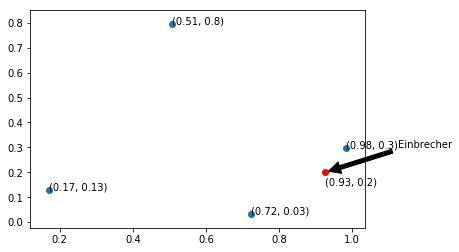

In [39]:
test_distance, test_datapoint, test_sensor = tdg.generateFromSensors(1, DIMENSIONS, COORDINATE_SYSTEM, sensors)      
result = model.predict(test_distance)

print("Ergebnis: Soll -> Prediction")
for i in range(DIMENSIONS):
    print("dim" + str(i) + ": " + str(test_datapoint[i][0]) + " -> " + str(result[i][0][0]))



x = sensors[0:SENSORS,0]
y = sensors[0:SENSORS,1]
    
fig, ax = plt.subplots()
ax.scatter(x, y)
print(test_distance)

for i in range(SENSORS):
    mes = round(x[i],2),round(y[i],2) 
    ax.annotate(mes, (x[i], y[i]))
 #   #te = round(test_distance[0][i], 5)
  #  bla = numpy.linalg.norm([x[i],y[i], result[0][0][0], result[1][0][0]])
   # print("Prediction: ", bla)
    #print("Real: ", test_distance[0][i])   
    
mes = round(result[0][0][0],2),round(result[1][0][0],2)
print(mes)
#ax.annotate(mes, (result[0][0][0], result[1][0][0]))

x = result[0][0][0]
y = result[1][0][0]
plt.plot(x, y, 'ro')
plt.text(x, y-0.05, mes)
plt.annotate('Einbrecher', xy=(x,y), xytext=(x+0.2, y+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))

#for i in range(SENSORS):
 #   plt.plot(sensors[i][0], sensors[i][1], 'ro')
  #  plt.plot([sensors[i][0], result[0][0][0]], [sensors[i][1], result[1][0][0]], 'k-')
#for i in range(Sensors)
#plt.plot(sensors[, 'ro')
plt.show()  

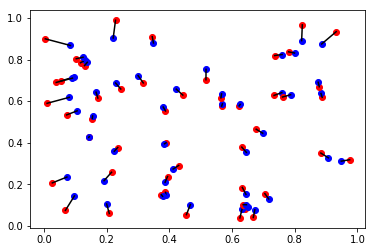

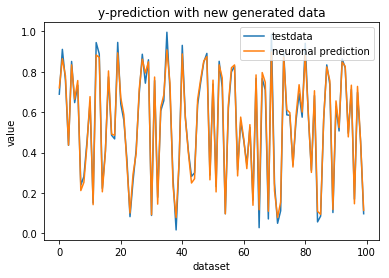

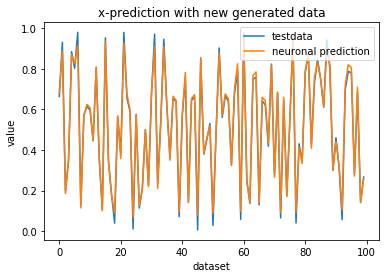

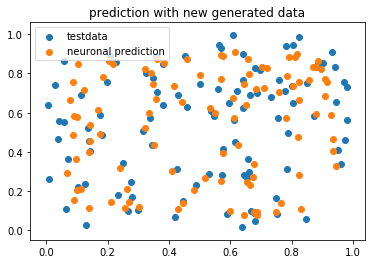

<function matplotlib.pyplot.show>

In [80]:
test_distance, test_datapoint, test_sensor = tdg.generateFromSensors(100, DIMENSIONS, COORDINATE_SYSTEM, sensors)       
    

testResult = model.predict(test_distance)

plt.figure()
plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction with new generated data')
plt.plot(test_datapoint[1])   
plt.plot(testResult[1])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()


plt.figure()
plt.ylabel('value')
plt.xlabel('dataset')
plt.title('x-prediction with new generated data')
plt.plot(test_datapoint[0])   
plt.plot(testResult[0])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()

plt.figure()
plt.title('prediction with new generated data')
plt.scatter(test_datapoint[0], test_datapoint[1])
plt.scatter(testResult[0], testResult[1])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()

#plt.figure()

for i in range(50):
    x1, x2 = test_datapoint[0][i], testResult[0][i]
    y1, y2 = test_datapoint[1][i], testResult[1][i]
    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'bo')
    plt.plot([x1, x2], [y1,y2], '-k') 

    
plt.show
    
